### Lottery

In [1]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from cycler import cycler

matplotlib.style.use("dark_background")
%matplotlib inline
rcParams["figure.figsize"] = (12, 6)
rcParams["axes.prop_cycle"] = cycler(color=["#4299E1", "#F56565", "#48BB78"])
rcParams["axes.facecolor"] = "#1A202C"
rcParams["axes.edgecolor"] = "#A0AEC0"
rcParams["axes.grid"] = True
rcParams["grid.color"] = "#A0AEC0"
rcParams["grid.alpha"] = 0.7
rcParams["axes.titlecolor"] = "#A0AEC0"
rcParams["axes.labelcolor"] = "#A0AEC0"
rcParams["xtick.color"] = "#A0AEC0"
rcParams["ytick.color"] = "#A0AEC0"

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv")
# We need to convert the date from the form MM/DD/YYYY to the form YYYY-MM-DD
def ConvertDates(dates):
    newDates = []
    for date in dates:
        arr = date.split("/")
        year = arr[2]
        month = arr[0]
        day = arr[1]
        newDates.append("{0}-{1}-{2}".format(year, month, day))
    series = pd.Series(newDates)
    return series

df["New Draw Date"] = ConvertDates(df["Draw Date"])

In [92]:
def SeparateWinNums(values, index):
    newNums = []
    for value in values:
        arr = value.split(" ")
        newNums.append(int(arr[index]))
    series = pd.Series(newNums)
    return series

def WinNumsToArr(values):
    newNums = []
    for value in values:
        arr = value.split(" ")
        newNums.append([int(x) for x in arr])
    series = pd.Series(newNums)
    return series

winningNumbers = df["Winning Numbers"]

df["Num 1"] = SeparateWinNums(winningNumbers, 0)
df["Num 2"] = SeparateWinNums(winningNumbers, 1)
df["Num 3"] = SeparateWinNums(winningNumbers, 2)
df["Num 4"] = SeparateWinNums(winningNumbers, 3)
df["Num 5"] = SeparateWinNums(winningNumbers, 4)
df["All Nums"] = WinNumsToArr(winningNumbers)
df.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier,New Draw Date,Num 1,Num 2,Num 3,Num 4,Num 5,All Nums
0,09/25/2020,20 36 37 48 67,16,2.0,2020-09-25,20,36,37,48,67,"[20, 36, 37, 48, 67]"
1,09/29/2020,14 39 43 44 67,19,3.0,2020-09-29,14,39,43,44,67,"[14, 39, 43, 44, 67]"
2,10/02/2020,09 38 47 49 68,25,2.0,2020-10-02,9,38,47,49,68,"[9, 38, 47, 49, 68]"
3,10/06/2020,15 16 18 39 59,17,3.0,2020-10-06,15,16,18,39,59,"[15, 16, 18, 39, 59]"
4,10/09/2020,05 11 25 27 64,13,2.0,2020-10-09,5,11,25,27,64,"[5, 11, 25, 27, 64]"


In [95]:
df = df[df["Mega Ball"] <= 25]
df = df[df["Num 4"] <= 70]
df = df[df["Num 5"] <= 70]
df = df.sort_values("New Draw Date", ascending=False)
df.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier,New Draw Date,Num 1,Num 2,Num 3,Num 4,Num 5,All Nums
1948,01/26/2021,29 49 56 66 67,24,3.0,2021-01-26,29,49,56,66,67,"[29, 49, 56, 66, 67]"
1947,01/22/2021,04 26 42 50 60,24,2.0,2021-01-22,4,26,42,50,60,"[4, 26, 42, 50, 60]"
1946,01/19/2021,10 19 26 28 50,16,2.0,2021-01-19,10,19,26,28,50,"[10, 19, 26, 28, 50]"
1945,01/15/2021,03 11 12 38 43,15,4.0,2021-01-15,3,11,12,38,43,"[3, 11, 12, 38, 43]"
1944,01/12/2021,12 14 26 28 33,9,2.0,2021-01-12,12,14,26,28,33,"[12, 14, 26, 28, 33]"


In [ ]:
df[str()]

C:\Users\markm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\markm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\markm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

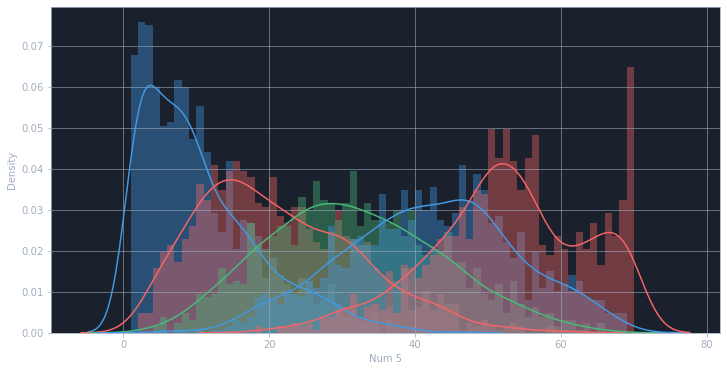

In [83]:
import scipy

def Plot(column):
    sns.distplot(df[column], bins=(np.max(df[column]) - np.min(df[column])))

Plot("Num 1")
Plot("Num 2")
Plot("Num 3")
Plot("Num 4")
Plot("Num 5")

C:\Users\markm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


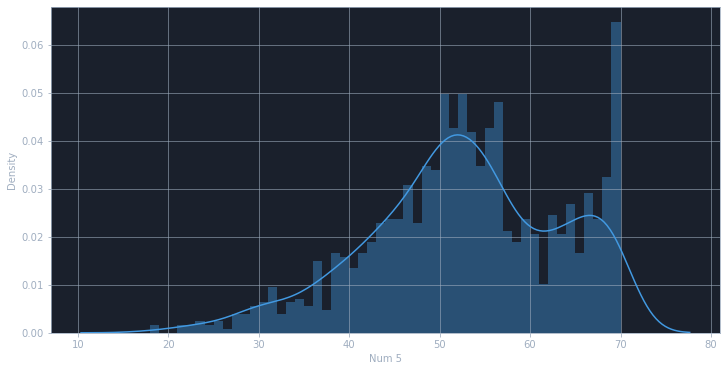

In [84]:
Plot("Num 5")

In [7]:
lenData = df["Num 5"].count()
print(np.random.rand())
print(np.random.rand())

0.09920933671309817
0.7127032568631908


Let's try generating random values based on the KDE of a given series:

In [26]:
def Gaussian(x, b=1):
    return np.exp(-x**2 / (2 * b**2)) / (b * np.sqrt(2 * np.pi))

def GenerateRandFromKDE(column):
    data = df[column]
    lenData = data.count()
    hist, bins = np.histogram(data, bins=100, range=(np.min(data), np.max(data)), density=True)
    dx = (bins[1] - bins[0])
    center = (bins[1:] + bins[:-1]) / 2
    
    h = 1.06 * np.std(data) * lenData**(-1 / 5.)
        
    generated = np.zeros(1000)
    i = 0
    while i < 1000:
        rand1 = np.random.rand(1)
        randNum = rand1 * (np.max(data) - np.min(data)) + np.min(data)
        if np.random.rand(1) <= np.sum((Gaussian(randNum - data, h)) / lenData):
            generated[i] = randNum
            i += 1
    return generated
    
randData = GenerateRandFromKDE("Num 5")

C:\Users\markm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

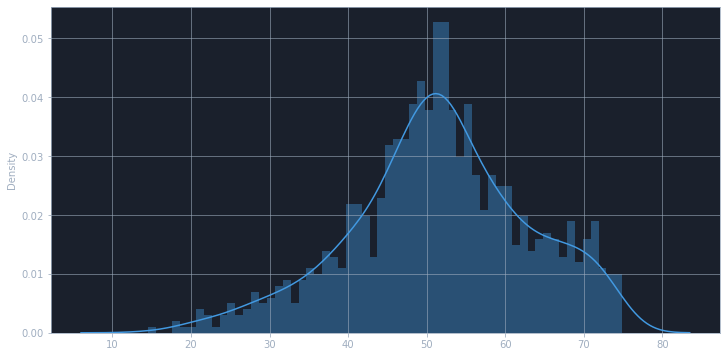

In [30]:
bins = int(np.max(randData) - np.min(randData))
sns.distplot(randData, bins=bins)

In [98]:
def GenerateRandValueFromKDE(column):
    data = df[column]
    lenData = data.count()
    hist, bins = np.histogram(data, bins=100, range=(np.min(data), np.max(data)), density=True)
    dx = (bins[1] - bins[0])
    center = (bins[1:] + bins[:-1]) / 2
    
    h = 1.06 * np.std(data) * lenData**(-1 / 5.)
        
    while True:
        rand1 = np.random.rand(1)
        randNum = rand1 * (np.max(data) - np.min(data)) + np.min(data)
        if np.random.rand(1) <= np.sum((Gaussian(randNum - data, h)) / lenData):
            return round(randNum[0])

amountToGenerate = 10
while True:
    isValid = True
    nums = []
    for i in range(amountToGenerate):
        nums.append([GenerateRandValueFromKDE("Num 1"), GenerateRandValueFromKDE("Num 2"), GenerateRandValueFromKDE("Num 3"), GenerateRandValueFromKDE("Num 4"), GenerateRandValueFromKDE("Num 5"), GenerateRandValueFromKDE("Mega Ball")])
    nums = np.array(nums)
    for x in nums:
        if len(np.unique(x)) != len(x):
            isValid = False
    if isValid == True:
        break

print(nums)

[[30 50 44 41 68 17]
 [ 1 11 34 24 47 21]
 [13 27 22 52 65  5]
 [35 25 45 46 69  3]
 [15  8 44 42 57 20]
 [ 8 11 33 47 36 16]
 [10 33 29 56 47 17]
 [18 22 38 28 70 21]
 [19 35 29 24 52  9]
 [ 2 15 16 30 65  5]]
